# Classifying Cars by Country (Pytorch)

#### Importing libraries

In [62]:
import pandas as pd
import numpy as np
import torch
from torch.nn import Sequential, Linear, ReLU, CrossEntropyLoss
from torch.optim import SGD
from torch.autograd import Variable
from torch import Tensor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import os
os.chdir('C:/Users/Nicolas/Documents/Data/thecarconnection')

#### Importing the data

In [2]:
df = pd.read_csv('cleaned_encoded_data.csv')

We're only going to keep a few columns with continuous variables

In [3]:
df.columns[:-220]

Index(['MSRP', 'Make', 'Model', 'Style Name', 'Passenger Capacity',
       'Passenger Doors', 'Front Shoulder Room (in)', 'Front Head Room (in)',
       'Second Leg Room (in)', 'Front Leg Room (in)',
       'Second Shoulder Room (in)', 'Second Head Room (in)',
       'Height, Overall (in)', 'Wheelbase (in)', 'Width, Max w/o mirrors (in)',
       'Fuel Tank Capacity, Approx (gal)', 'EPA Fuel Economy Est - Hwy (MPG)',
       'EPA Fuel Economy Est - City (MPG)', 'Third Gear Ratio (:1)',
       'First Gear Ratio (:1)', 'Fourth Gear Ratio (:1)',
       'Second Gear Ratio (:1)', 'Front Brake Rotor Diam x Thickness (in)',
       'Rear Brake Rotor Diam x Thickness (in)',
       'Turning Diameter - Curb to Curb', 'Basic Miles/km', 'Basic Years',
       'Corrosion Miles/km', 'Corrosion Years', 'Drivetrain Miles/km',
       'Drivetrain Years', 'Roadside Assistance Miles/km',
       'Roadside Assistance Years', 'Hybrid Engine', 'Gears', 'Net Horsepower',
       'Net Horsepower RPM', 'Net Torque', 

In [4]:
num_germany, num_japan, num_usa = df['Country: Germany'].sum()/df.shape[0], df['Country: Japan'].sum()/df.shape[0],\
    df['Country: USA'].sum()/df.shape[0]
print('The countries of origin are as follow: {}% from Germany, {}% from Japan, and'.format(int(num_germany*100), 
                            int(num_japan*100)), '{}% from the USA.'.format(int(num_usa*100)))

The countries of origin are as follow: 17% from Germany, 30% from Japan, and 39% from the USA.


In [5]:
df = df[['MSRP', 'Front Shoulder Room (in)', 'Front Head Room (in)',
       'Second Leg Room (in)', 'Front Leg Room (in)',
       'Second Shoulder Room (in)', 'Second Head Room (in)',
       'Height, Overall (in)', 'Wheelbase (in)', 'Width, Max w/o mirrors (in)',
       'Fuel Tank Capacity, Approx (gal)', 'EPA Fuel Economy Est - Hwy (MPG)',
       'EPA Fuel Economy Est - City (MPG)', 'Third Gear Ratio (:1)',
       'First Gear Ratio (:1)', 'Fourth Gear Ratio (:1)',
       'Second Gear Ratio (:1)', 'Front Brake Rotor Diam x Thickness (in)',
       'Rear Brake Rotor Diam x Thickness (in)',
       'Turning Diameter - Curb to Curb', 'Gears', 'Net Horsepower',
       'Net Horsepower RPM', 'Net Torque', 'Net Torque RPM', 
       'Displacement (L)', 'Displacement (cc)', 'Rear Tire Width',
       'Front Tire Width', 'Rear Wheel Size', 'Front Wheel Size', 
        'Country: Germany', 'Country: Japan', 'Country: USA']]

In [6]:
df = df.loc[df.iloc[:, -3:].sum(axis=1) == 1] # keeping only German, Japanese, and American cars

In [7]:
df.head()

,MSRP,Front Shoulder Room (in),Front Head Room (in),Second Leg Room (in),Front Leg Room (in),Second Shoulder Room (in),Second Head Room (in),"Height, Overall (in)",Wheelbase (in),"Width, Max w/o mirrors (in)",...,Net Torque RPM,Displacement (L),Displacement (cc),Rear Tire Width,Front Tire Width,Rear Wheel Size,Front Wheel Size,Country: Germany,Country: Japan,Country: USA
0,30034.0,65.2,41.0,33.7,41.30,66.3,38.4,76.2,143.5,79.7,...,4000.0,6.0,364.0,245.0,245.0,16.0,16.0,0.0,0.0,1.0
1,19515.0,54.5,39.2,39.1,42.40,40.0,33.2,66.3,125.7,69.4,...,3750.0,2.3,140.0,225.0,225.0,15.0,15.0,0.0,0.0,1.0
2,24595.0,56.3,40.8,37.8,43.00,56.1,39.3,65.7,107.9,71.7,...,4000.0,2.5,150.0,225.0,225.0,17.0,17.0,0.0,1.0,0.0
3,56600.0,58.9,39.6,36.0,41.86,56.7,38.9,67.4,114.0,76.3,...,1750.0,3.0,181.0,255.0,255.0,18.0,18.0,1.0,0.0,0.0
4,21795.0,57.5,40.1,39.3,41.00,55.5,39.0,65.7,106.3,72.4,...,4000.0,2.0,122.0,225.0,225.0,17.0,17.0,0.0,1.0,0.0


#### Separating `X` and `y`

In [8]:
X = df.iloc[:, :-3].values.astype(np.float64)

In [19]:
y = df.iloc[:, -3:].values.astype(np.float64)

In [20]:
assert X.shape[0] == y.shape[0]

#### Scaling the data

In [21]:
scaler = MinMaxScaler()

In [22]:
X = scaler.fit_transform(X)

In [23]:
y[:10] 

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [24]:
np.where(y == 1)[1][:10]

array([2, 2, 1, 0, 1, 2, 2, 1, 1, 2], dtype=int64)

In [25]:
y = np.where(y == 1)[1].astype(np.float64)

#### Train test split

In [26]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Prediction 

In [65]:
hidden_units = 64

In [66]:
model = Sequential(
    Linear(31, 64),
    ReLU(),
    Linear(64, 128),
    ReLU(),
    Linear(128, 3)
)

In [67]:
criterion = CrossEntropyLoss()
optimizer = SGD(model.parameters(), lr=1e-1, momentum=9e-1)

In [68]:
epochs = 1_000

In [69]:
loss_history = []
for epoch in range(epochs):
    inx = np.random.randint(0, x_train.shape[0], 24_000)
    inputs = Variable(Tensor(x_train[inx]).float())
    targets = Variable(Tensor(y_train[inx]).long())
    optimizer.zero_grad()
    out = model(inputs)
    loss = criterion(out, targets)
    loss.backward()
    optimizer.step()
    loss_history.append(loss.item())
    
    if epoch == 0 or (epoch + 1) % 100 == 0:
        print('Epoch %d Loss: %.4f' % (epoch + 1, loss.item()))    

Epoch 1 Loss: 1.0874
Epoch 100 Loss: 0.5189
Epoch 200 Loss: 0.4697
Epoch 300 Loss: 0.2880
Epoch 400 Loss: 0.6979
Epoch 500 Loss: 0.2616
Epoch 600 Loss: 0.2342
Epoch 700 Loss: 0.2870
Epoch 800 Loss: 0.1909
Epoch 900 Loss: 0.1532
Epoch 1000 Loss: 0.1395


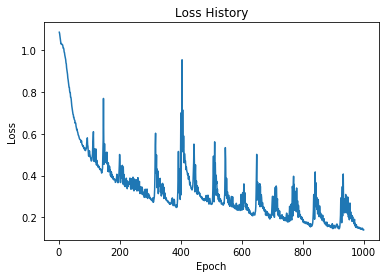

In [76]:
fig, ax = plt.subplots()
ax.plot(np.arange(1, len(loss_history)+1), loss_history)
_ = plt.title('Loss History')
_ = plt.ylabel('Loss')
_ = plt.xlabel('Epoch')

#### Test accuracy

In [71]:
inputs = Variable(Tensor(x_test).float())
targets = Variable(Tensor(y_test).long())

In [72]:
optimizer.zero_grad()
out = model(inputs)
_, predicted = torch.max(out.data, 1)

In [73]:
error_count = y_test.size - np.count_nonzero((targets == predicted).numpy())

In [74]:
print('Errors: %d — Accuracy: %d%%' % (error_count, 100*torch.sum(targets == predicted)/y_test.size))

Errors: 276 — Accuracy: 94%


In [75]:
print('Using 1/6th of the features, we can classify cars according to their',
     'country with {}% accuracy!'.format(100*torch.sum(targets == predicted)/y_test.size))

Using 1/6th of the features, we can classify cars according to their country with 94% accuracy!
